In [0]:
from google.colab import files
uploaded = files.upload()

Saving whats-cooking.zip to whats-cooking.zip


In [0]:
!unzip whats-cooking.zip

Archive:  whats-cooking.zip
  inflating: train.json              
  inflating: sample_submission.csv   
  inflating: test.json               


In [0]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
!head train.json

[
  {
    "id": 10259,
    "cuisine": "greek",
    "ingredients": [
      "romaine lettuce",
      "black olives",
      "grape tomatoes",
      "garlic",
      "pepper",


In [0]:
train = pd.read_json('train.json')
print(train.shape)
train.head()

(39774, 3)


,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [0]:
train.isnull().sum().sort_values()

id             0
cuisine        0
ingredients    0
dtype: int64

In [0]:
train.dtypes

id              int64
cuisine        object
ingredients    object
dtype: object

## Organize and plot cuisine types

In [0]:
# Cuisines count and listed by number of recipes
train_cus= pd.DataFrame(train['cuisine'].value_counts())
print(train_cus.shape)
train_cus.head()

(20, 1)


,cuisine
italian,7838
mexican,6438
southern_us,4320
indian,3003
chinese,2673


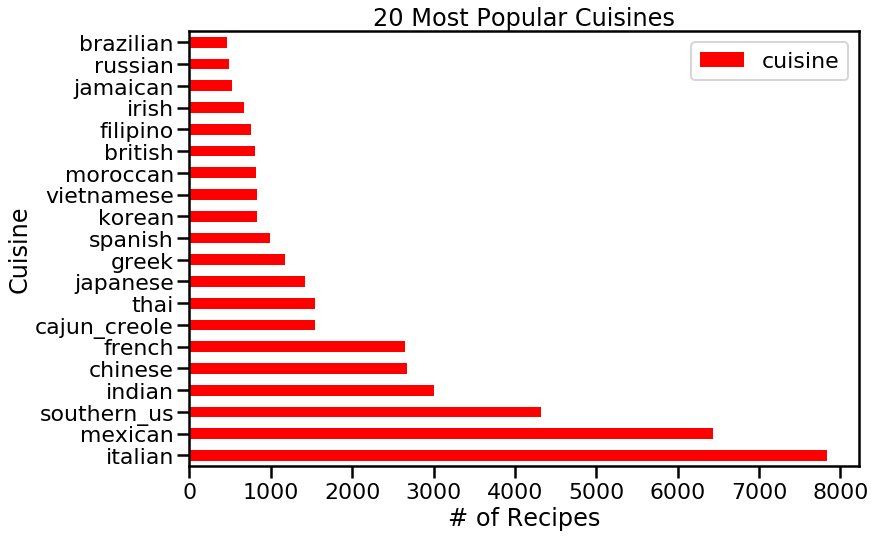

In [0]:
sns.set_context("poster")

ax_cus = train_cus[:20].plot(kind='barh', figsize=(12,8), color="r")
ax_cus.set_ylabel("Cuisine")
ax_cus.set_xlabel("# of Recipes")
ax_cus.set_title('20 Most Popular Cuisines');

## Separate, Clean and Organize Ingredients

In [0]:
# Move 'ingredients' column to separate dataframe
ingredients = pd.DataFrame(train['ingredients'].tolist())
ingredients.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,plain flour,ground pepper,salt,tomatoes,ground black pepper,thyme,eggs,green tomatoes,yellow corn meal,milk,vegetable oil,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,eggs,pepper,salt,mayonaise,cooking oil,green chilies,grilled chicken breasts,garlic powder,yellow onion,soy sauce,butter,chicken livers,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,water,vegetable oil,wheat,salt,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,black pepper,shallots,cornflour,cayenne pepper,onions,garlic paste,milk,butter,salt,lemon juice,water,chili powder,passata,oil,ground cumin,boneless chicken skinless thigh,garam masala,double cream,natural yogurt,bay leaf,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [0]:
ingredients.replace('ground black pepper', 'pepper', inplace = True)
ingredients.replace('ground pepper', 'pepper', inplace = True)
ingredients.replace('black pepper', 'pepper', inplace = True)
ingredients.replace('garlic cloves', 'garlic', inplace = True)
ingredients.replace('unsalted butter', 'butter', inplace = True)
ingredients.replace('large eggs', 'eggs', inplace = True)
ingredients.replace('extra-virgin olive oil', 'olive oil', inplace = True)
ingredients.replace('fresh lime juice', 'lime', inplace = True)
ingredients.replace('flat leaf parsley', 'fresh parsley', inplace = True)
ingredients.replace('grated parmesan cheese', 'parmesan cheese', inplace = True)
ingredients.replace('fresh ginger', 'ginger', inplace = True)
ingredients.replace('all-purpose flour', 'flour', inplace = True)
ingredients.replace('ground cinnamon', 'cinnamon', inplace = True)
ingredients.replace('ground turmeric', 'turmeric', inplace = True)

In [0]:
ingredients.isnull().sum()

0         0
1        22
2       215
3       764
4      1892
      ...  
60    39773
61    39773
62    39773
63    39773
64    39773
Length: 65, dtype: int64

In [0]:
ingredients= ingredients.fillna('None')
ingredients.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
60    0
61    0
62    0
63    0
64    0
Length: 65, dtype: int64

In [0]:
ingredients = ingredients.replace('None', np.nan)
print(ingredients.shape)
ingredients.head()

(39774, 65)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,plain flour,pepper,salt,tomatoes,pepper,thyme,eggs,green tomatoes,yellow corn meal,milk,vegetable oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,eggs,pepper,salt,mayonaise,cooking oil,green chilies,grilled chicken breasts,garlic powder,yellow onion,soy sauce,butter,chicken livers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,water,vegetable oil,wheat,salt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pepper,shallots,cornflour,cayenne pepper,onions,garlic paste,milk,butter,salt,lemon juice,water,chili powder,passata,oil,ground cumin,boneless chicken skinless thigh,garam masala,double cream,natural yogurt,bay leaf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plot top Ingredients

In [0]:
top_ingredients = ingredients.stack()
print(top_ingredients.shape)
top_ingredients.head()

(428275,)


0  0    romaine lettuce
   1       black olives
   2     grape tomatoes
   3             garlic
   4             pepper
dtype: object

In [0]:
ti = pd.DataFrame(top_ingredients.value_counts(),columns=['Count'])
ti.head()

,Count
salt,18049
garlic,13617
pepper,12235
olive oil,10719
onions,7972


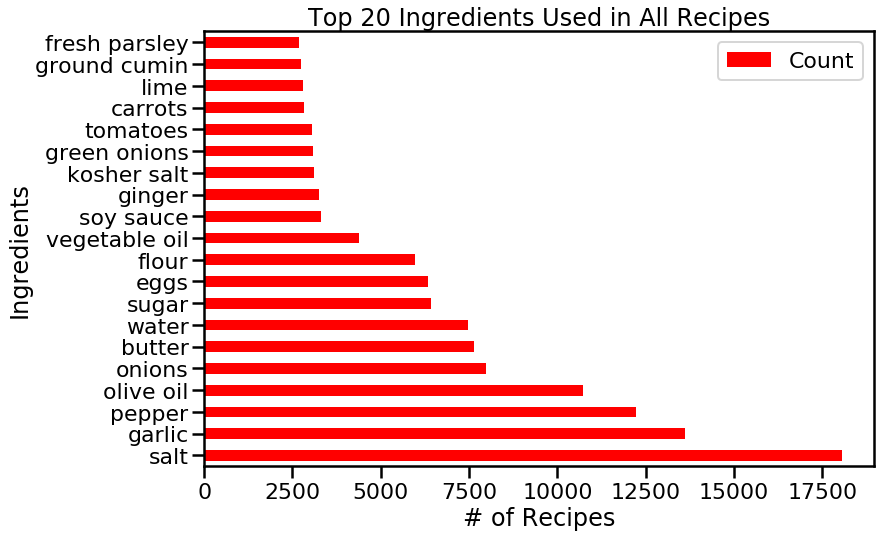

In [0]:
sns.set_context("poster")
ax = ti[:20].plot(kind='barh', figsize=(12,8), color="red")
ax.set_ylabel("Ingredients")
ax.set_xlabel("# of Recipes")
ax.set_title('Top 20 Ingredients Used in All Recipes');

In [0]:
ingredients.columns = ['Ingredient #1', 'Ingredient #2', 'Ingredient #3', 'Ingredient #4',
                       'Ingredient #5','Ingredient #6','Ingredient #7','Ingredient #8',
                       'Ingredient #9','Ingredient #10','Ingredient #10','Ingredient #12',
                       'Ingredient #13','Ingredient #14','Ingredient #15','Ingredient #16',
                       'Ingredient #17','Ingredient #18','Ingredient #19','Ingredient #20',
                       'Ingredient #21','Ingredient 22','Ingredient #23','Ingredient #24',
                       'Ingredient #25','Ingredient #26','Ingredient #27','Ingredient #28',
                       'Ingredient #29','Ingredient #30','Ingredient #31','Ingredient #32',
                       'Ingredient #33','Ingredient #34','Ingredient #35','Ingredient #36',
                       'Ingredient #37','Ingredient #38','Ingredient #39','Ingredient #40',
                       'Ingredient #41','Ingredient #42','Ingredient #43','Ingredient #44',
                       'Ingredient #45','Ingredient #46','Ingredient #47','Ingredient #48',
                       'Ingredient #49','Ingredient #50','Ingredient #51','Ingredient #52',
                       'Ingredient #53','Ingredient #54','Ingredient #55','Ingredient #56',
                       'Ingredient #57','Ingredient #58','Ingredient #59','Ingredient #60',
                       'Ingredient #61','Ingredient #62','Ingredient #63','Ingredient #64', 'Ingredient #65']
print(ingredients.shape)
ingredients.head()

(39774, 65)


,Ingredient #1,Ingredient #2,Ingredient #3,Ingredient #4,Ingredient #5,Ingredient #6,Ingredient #7,Ingredient #8,Ingredient #9,Ingredient #10,Ingredient #10,Ingredient #12,Ingredient #13,Ingredient #14,Ingredient #15,Ingredient #16,Ingredient #17,Ingredient #18,Ingredient #19,Ingredient #20,Ingredient #21,Ingredient 22,Ingredient #23,Ingredient #24,Ingredient #25,Ingredient #26,Ingredient #27,Ingredient #28,Ingredient #29,Ingredient #30,Ingredient #31,Ingredient #32,Ingredient #33,Ingredient #34,Ingredient #35,Ingredient #36,Ingredient #37,Ingredient #38,Ingredient #39,Ingredient #40,Ingredient #41,Ingredient #42,Ingredient #43,Ingredient #44,Ingredient #45,Ingredient #46,Ingredient #47,Ingredient #48,Ingredient #49,Ingredient #50,Ingredient #51,Ingredient #52,Ingredient #53,Ingredient #54,Ingredient #55,Ingredient #56,Ingredient #57,Ingredient #58,Ingredient #59,Ingredient #60,Ingredient #61,Ingredient #62,Ingredient #63,Ingredient #64,Ingredient #65
0,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,plain flour,pepper,salt,tomatoes,pepper,thyme,eggs,green tomatoes,yellow corn meal,milk,vegetable oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,eggs,pepper,salt,mayonaise,cooking oil,green chilies,grilled chicken breasts,garlic powder,yellow onion,soy sauce,butter,chicken livers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,water,vegetable oil,wheat,salt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pepper,shallots,cornflour,cayenne pepper,onions,garlic paste,milk,butter,salt,lemon juice,water,chili powder,passata,oil,ground cumin,boneless chicken skinless thigh,garam masala,double cream,natural yogurt,bay leaf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Join Ingredients and Cuisine 

In [0]:
# Join datasets back together, drop 'ingedients' column, rename 'id' column to 'Recipe ID'
df = pd.concat([train,ingredients], axis=1).drop(['ingredients'], axis=1)
df.rename(columns={'id':'Recipe ID'}, inplace=True)
print(df.shape)
df.head()

(39774, 67)


,Recipe ID,cuisine,Ingredient #1,Ingredient #2,Ingredient #3,Ingredient #4,Ingredient #5,Ingredient #6,Ingredient #7,Ingredient #8,Ingredient #9,Ingredient #10,Ingredient #10,Ingredient #12,Ingredient #13,Ingredient #14,Ingredient #15,Ingredient #16,Ingredient #17,Ingredient #18,Ingredient #19,Ingredient #20,Ingredient #21,Ingredient 22,Ingredient #23,Ingredient #24,Ingredient #25,Ingredient #26,Ingredient #27,Ingredient #28,Ingredient #29,Ingredient #30,Ingredient #31,Ingredient #32,Ingredient #33,Ingredient #34,Ingredient #35,Ingredient #36,Ingredient #37,Ingredient #38,Ingredient #39,Ingredient #40,Ingredient #41,Ingredient #42,Ingredient #43,Ingredient #44,Ingredient #45,Ingredient #46,Ingredient #47,Ingredient #48,Ingredient #49,Ingredient #50,Ingredient #51,Ingredient #52,Ingredient #53,Ingredient #54,Ingredient #55,Ingredient #56,Ingredient #57,Ingredient #58,Ingredient #59,Ingredient #60,Ingredient #61,Ingredient #62,Ingredient #63,Ingredient #64,Ingredient #65
0,10259,greek,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25693,southern_us,plain flour,pepper,salt,tomatoes,pepper,thyme,eggs,green tomatoes,yellow corn meal,milk,vegetable oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20130,filipino,eggs,pepper,salt,mayonaise,cooking oil,green chilies,grilled chicken breasts,garlic powder,yellow onion,soy sauce,butter,chicken livers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22213,indian,water,vegetable oil,wheat,salt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13162,indian,pepper,shallots,cornflour,cayenne pepper,onions,garlic paste,milk,butter,salt,lemon juice,water,chili powder,passata,oil,ground cumin,boneless chicken skinless thigh,garam masala,double cream,natural yogurt,bay leaf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# Stack Ingreditns columns on top of eachother
df_melt= df.melt(id_vars='cuisine', value_vars=['Ingredient #1', 'Ingredient #2', 'Ingredient #3', 'Ingredient #4',
                       'Ingredient #5','Ingredient #6','Ingredient #7','Ingredient #8',
                       'Ingredient #9','Ingredient #10','Ingredient #10','Ingredient #12',
                       'Ingredient #13','Ingredient #14','Ingredient #15','Ingredient #16',
                       'Ingredient #17','Ingredient #18','Ingredient #19','Ingredient #20',
                       'Ingredient #21','Ingredient 22','Ingredient #23','Ingredient #24',
                       'Ingredient #25','Ingredient #26','Ingredient #27','Ingredient #28',
                       'Ingredient #29','Ingredient #30','Ingredient #31','Ingredient #32',
                       'Ingredient #33','Ingredient #34','Ingredient #35','Ingredient #36',
                       'Ingredient #37','Ingredient #38','Ingredient #39','Ingredient #40',
                       'Ingredient #41','Ingredient #42','Ingredient #43','Ingredient #44',
                       'Ingredient #45','Ingredient #46','Ingredient #47','Ingredient #48',
                       'Ingredient #49','Ingredient #50','Ingredient #51','Ingredient #52',
                       'Ingredient #53','Ingredient #54','Ingredient #55','Ingredient #56',
                       'Ingredient #57','Ingredient #58','Ingredient #59','Ingredient #60',
                       'Ingredient #61','Ingredient #62','Ingredient #63','Ingredient #64',
                       'Ingredient #65'])
print(df_melt.shape)
df_melt.head()

(2664858, 3)


,cuisine,variable,value
0,greek,Ingredient #1,romaine lettuce
1,southern_us,Ingredient #1,plain flour
2,filipino,Ingredient #1,eggs
3,indian,Ingredient #1,water
4,indian,Ingredient #1,pepper


In [0]:
df_melt = pd.DataFrame(df_melt)

In [0]:
df_melt.columns=['cuisine','ingredient #', 'ingredients']
print(df_melt.shape)
df_melt.head()

(2664858, 3)


,cuisine,ingredient #,ingredients
0,greek,Ingredient #1,romaine lettuce
1,southern_us,Ingredient #1,plain flour
2,filipino,Ingredient #1,eggs
3,indian,Ingredient #1,water
4,indian,Ingredient #1,pepper


In [0]:
# Dataset of all ingredients sorted by cuisine and counted
sorted_by_ingredients = pd.DataFrame(df_melt.groupby('cuisine')['ingredients'].value_counts())
sorted_by_ingredients.columns = ['count']

In [0]:
sorted_by_ingredients= pd.DataFrame(sorted_by_ingredients.reset_index().set_index('cuisine'))
print(sorted_by_ingredients.shape)
sorted_by_ingredients.head()

(28930, 2)


,ingredients,count
cuisine,,
brazilian,salt,216
brazilian,garlic,191
brazilian,onions,149
brazilian,olive oil,145
brazilian,pepper,140


## Create and plot dataset with 5 top cuisines and 15 top ingredients

In [0]:
# Select top 5 cuisines
select_cuisine = sorted_by_ingredients.loc[['italian','mexican', 'southern_us', 'indian', 'chinese']]

In [0]:
select_cuisine = pd.DataFrame(select_cuisine.reset_index().set_index('ingredients'))
print(select_cuisine.shape)
select_cuisine.head(10)

(11466, 2)


,cuisine,count
ingredients,,
olive oil,italian,4827
salt,italian,3846
pepper,italian,3429
garlic,italian,3406
parmesan cheese,italian,2227
butter,italian,1747
fresh parsley,italian,1377
onions,italian,1377
eggs,italian,1346


In [0]:
# Select top 15 Ingredients
top20_in_cuisines = select_cuisine.loc[['salt','garlic', 'pepper', 'olive oil', 'onions', 'butter',
                       'water', 'sugar', 'eggs', 'flour', 'vegetable oil',
                       'soy sauce', 'ginger', 'kosher salt', 'green onions']]

In [0]:
top20_in_cuisines = pd.DataFrame(top20_in_cuisines.reset_index())
print(top20_in_cuisines.shape)
top20_in_cuisines.head()

(75, 3)


,ingredients,cuisine,count
0,salt,italian,3846
1,salt,mexican,2981
2,salt,southern_us,2505
3,salt,indian,2161
4,salt,chinese,994


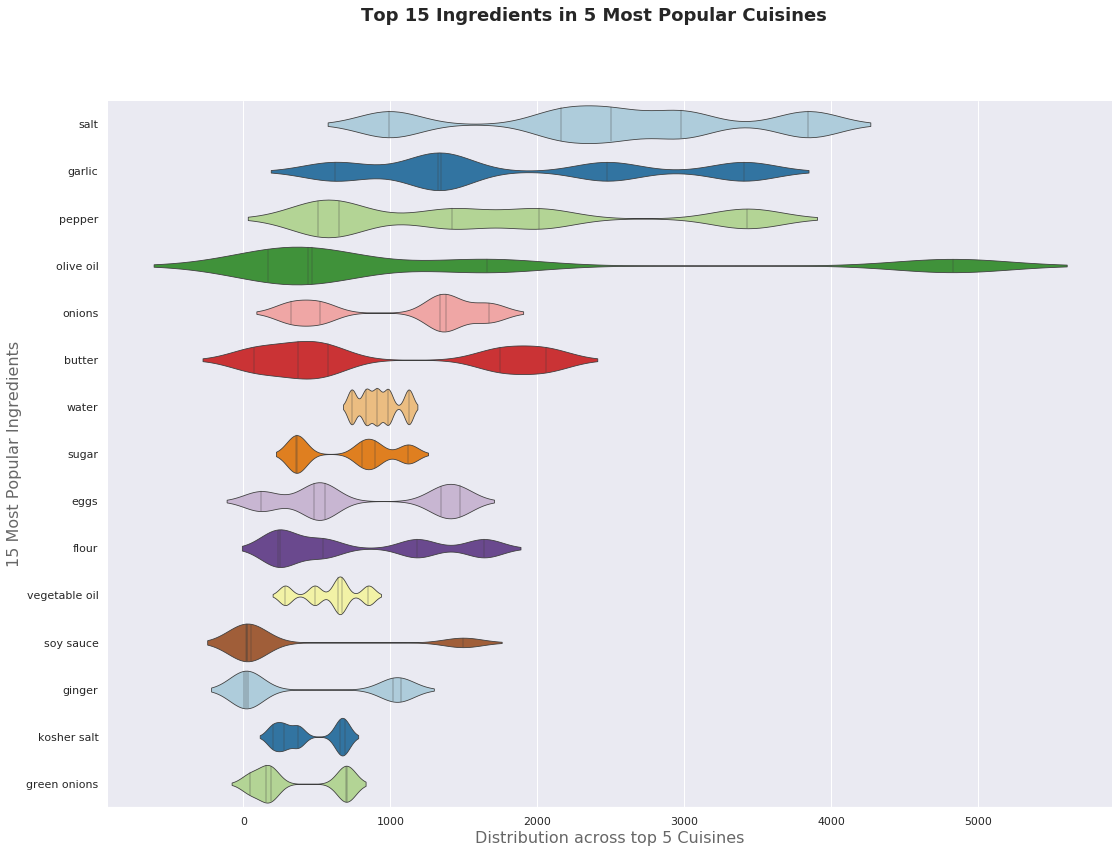

In [0]:
sns.set(style="darkgrid")
f, ax_top20 = plt.subplots(figsize=(18, 13))
sns.violinplot(x="count",y="ingredients",data = top20_in_cuisines, palette="Paired", inner="stick", bw =.2, scale = 'count', linewidth=.8)
sns.despine(left=True)
f.suptitle('Top 15 Ingredients in 5 Most Popular Cuisines', fontsize=18, fontweight='bold')
ax_top20.set_xlabel("Distribution across top 5 Cuisines",size = 16,alpha=0.7)
ax_top20.set_ylabel("15 Most Popular Ingredients",size = 16,alpha=0.7);

## Standirdize above plot

In [0]:
# Copy dataset
top20 = top20_in_cuisines.copy()

In [0]:
cat_cols = top20.columns[top20.dtypes=='object']
num_cols = top20.columns[top20.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

2 categorical columns
1 numerical columns


In [0]:
top20[cat_cols] = top20[cat_cols].astype('category')
top20.dtypes

ingredients    category
cuisine        category
count             int64
dtype: object

In [0]:
for col in cat_cols:
  top20[col] = top20[col].cat.codes

print(top20.shape)
top20.head()

(75, 3)


,ingredients,cuisine,count
0,10,2,3846
1,10,3,2981
2,10,4,2505
3,10,1,2161
4,10,0,994


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
top20 = scaler.fit_transform(top20)
top20

array([[ 6.94365075e-01,  0.00000000e+00,  2.98528637e+00],
       [ 6.94365075e-01,  7.07106781e-01,  2.08254953e+00],
       [ 6.94365075e-01,  1.41421356e+00,  1.58578336e+00],
       [ 6.94365075e-01, -7.07106781e-01,  1.22677588e+00],
       [ 6.94365075e-01, -1.41421356e+00,  8.86386691e-03],
       [-9.25820100e-01,  0.00000000e+00,  2.52609075e+00],
       [-9.25820100e-01,  7.07106781e-01,  1.55551820e+00],
       [-9.25820100e-01,  1.41421356e+00, -3.75190649e-01],
       [-9.25820100e-01, -7.07106781e-01,  3.56391459e-01],
       [-9.25820100e-01, -1.41421356e+00,  3.72045855e-01],
       [ 4.62910050e-01,  0.00000000e+00,  2.55009416e+00],
       [ 4.62910050e-01,  7.07106781e-01,  1.06918829e+00],
       [ 4.62910050e-01,  1.41421356e+00,  4.55535967e-01],
       [ 4.62910050e-01, -7.07106781e-01, -3.52230868e-01],
       [ 4.62910050e-01, -1.41421356e+00, -5.01469444e-01],
       [ 0.00000000e+00,  0.00000000e+00,  4.00908387e+00],
       [ 0.00000000e+00,  7.07106781e-01

In [0]:
standardized= pd.DataFrame(top20)
print(standardized.shape)
standardized.head()

(75, 3)


,0,1,2
0,0.694365,0.000000,2.985286
1,0.694365,0.707107,2.082550
2,0.694365,1.414214,1.585783
3,0.694365,-0.707107,1.226776
4,0.694365,-1.414214,0.008864


In [0]:
standardized.columns=['ingredients', 'cuisine','count']
standardized.head(10)

,ingredients,cuisine,count
0,0.694365,0.000000,2.985286
1,0.694365,0.707107,2.082550
2,0.694365,1.414214,1.585783
3,0.694365,-0.707107,1.226776
4,0.694365,-1.414214,0.008864
5,-0.925820,0.000000,2.526091
6,-0.925820,0.707107,1.555518
7,-0.925820,1.414214,-0.375191
8,-0.925820,-0.707107,0.356391
9,-0.925820,-1.414214,0.372046


In [0]:
stan = pd.concat([top20_in_cuisines['ingredients'],top20_in_cuisines['cuisine'],standardized['count']], axis=1)
stan.head()

,ingredients,cuisine,count
0,salt,italian,2.985286
1,salt,mexican,2.082550
2,salt,southern_us,1.585783
3,salt,indian,1.226776
4,salt,chinese,0.008864


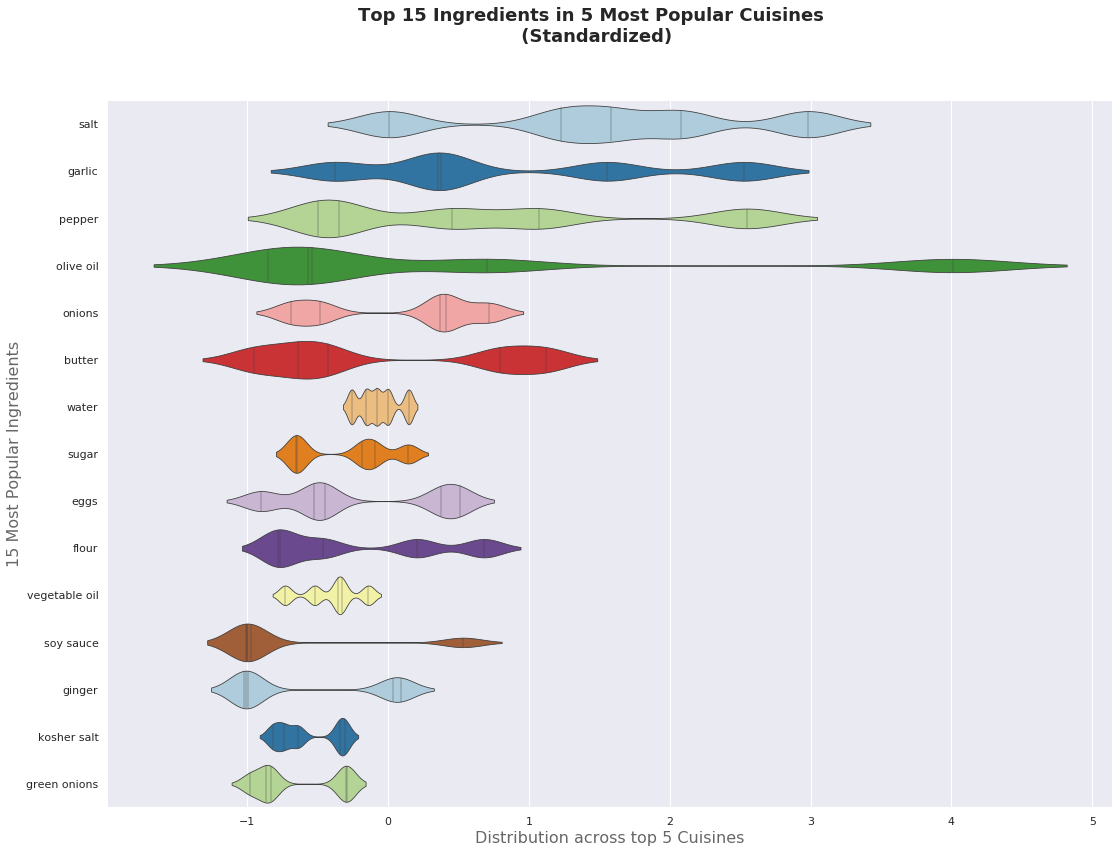

In [0]:
sns.set(style="darkgrid")
f, ax_stan = plt.subplots(figsize=(18, 13))
sns.violinplot(x="count",y="ingredients",data = stan, palette="Paired", inner="stick", bw =.2, scale = 'count', linewidth=.8)
sns.despine(left=True)
f.suptitle('Top 15 Ingredients in 5 Most Popular Cuisines \n (Standardized)', fontsize=18, fontweight='bold')
ax_stan.set_xlabel("Distribution across top 5 Cuisines",size = 16,alpha=0.7)
ax_stan.set_ylabel("15 Most Popular Ingredients",size = 16,alpha=0.7);

## Top Italian Ingrediants

In [0]:
cuisine = df.groupby('cuisine')


In [0]:
italian = cuisine.get_group('italian')
italian_top=italian.melt(id_vars='cuisine').drop(['cuisine', 'variable'], axis=1)
italian_final = pd.DataFrame(italian_top['value'].value_counts())
print(italian_final.shape)
italian_final.head()


(10754, 1)


,value
olive oil,4473
salt,3454
pepper,3122
garlic,3090
parmesan cheese,2054


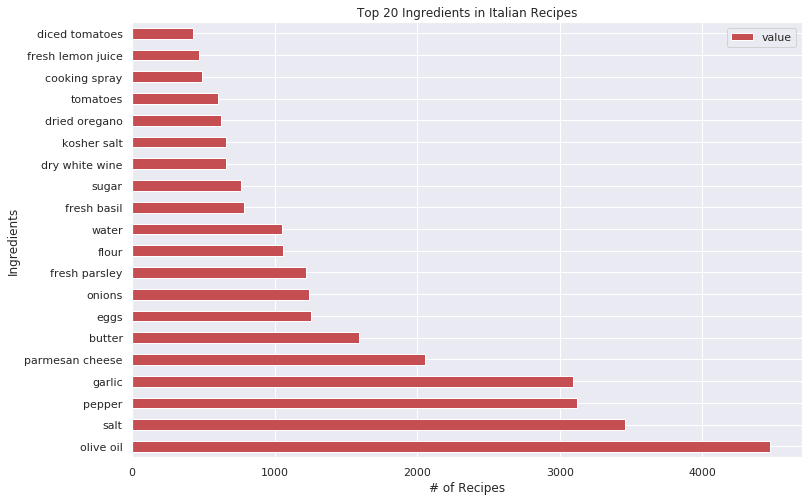

In [0]:
ax_italian = italian_final[:20].plot(kind='barh', figsize=(12,8), color = 'r')
ax_italian.set_ylabel("Ingredients")
ax_italian.set_xlabel("# of Recipes")
ax_italian.set_title('Top 20 Ingredients in Italian Recipes');

## Top Mexican Ingediants

In [0]:
mexican = cuisine.get_group('mexican')
mexican_top= mexican.melt(id_vars='cuisine').drop(['cuisine', 'variable'], axis=1)
mexican_final = pd.DataFrame (mexican_top['value'].value_counts())
print(mexican_final.shape)
mexican_final.head()

(9109, 1)


,value
salt,2720
garlic,2238
pepper,1841
olive oil,1495
onions,1493


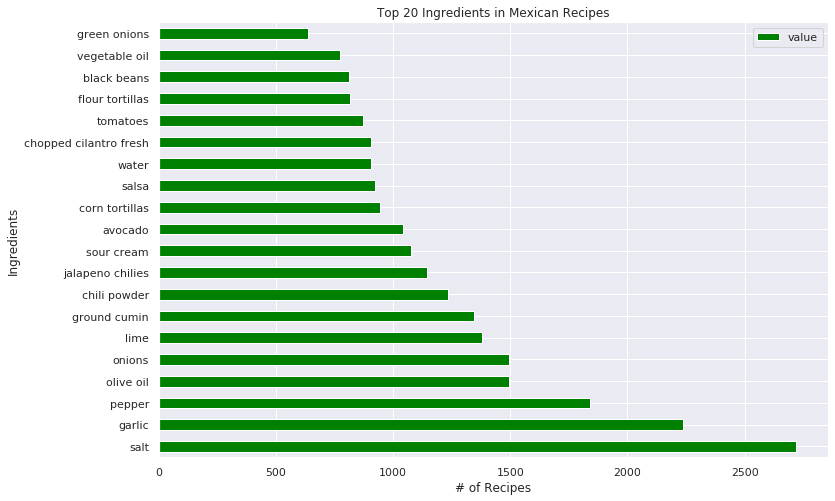

In [0]:
ax_mexican = mexican_final[:20].plot(kind='barh', figsize=(12,8), color= 'green')
ax_mexican.set_ylabel("Ingredients")
ax_mexican.set_xlabel("# of Recipes")
ax_mexican.set_title('Top 20 Ingredients in Mexican Recipes');

## Top Southern_US Ingediants

In [0]:
southern_us = cuisine.get_group('southern_us')
southern_us_top= southern_us.melt(id_vars='cuisine').drop(['cuisine', 'variable'], axis=1)
southern_us_final = pd.DataFrame (southern_us_top['value'].value_counts())
print(southern_us_final.shape)
southern_us_final.head()

(6769, 1)


,value
salt,2290
butter,1910
flour,1491
eggs,1368
pepper,1328


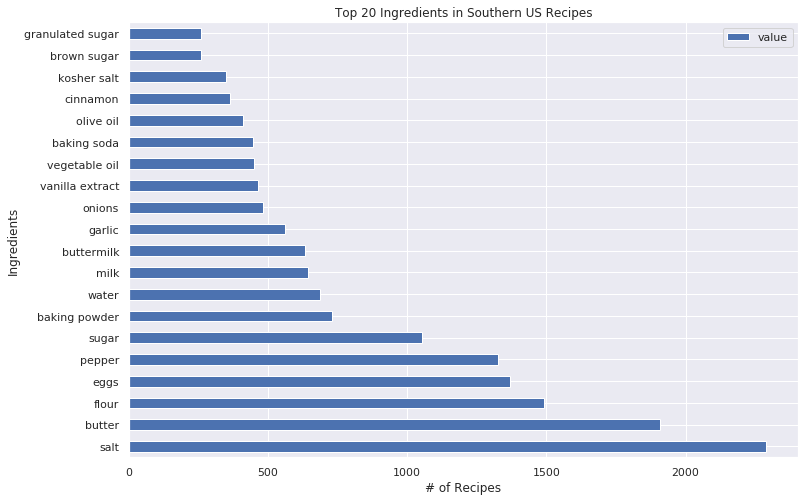

In [0]:
ax_southern_us = southern_us_final[:20].plot(kind='barh', figsize=(12,8))
ax_southern_us.set_ylabel("Ingredients")
ax_southern_us.set_xlabel("# of Recipes")
ax_southern_us.set_title('Top 20 Ingredients in Southern US Recipes');

## Top Indian Ingediants

In [0]:
indian = cuisine.get_group('indian')
indian_top= indian.melt(id_vars='cuisine').drop(['cuisine', 'variable'], axis=1)
indian_final = pd.DataFrame(indian_top['value'].value_counts())
print(indian_final.shape)
indian_final.head()

(4654, 1)


,value
salt,1934
onions,1195
garlic,1172
ginger,905
garam masala,862


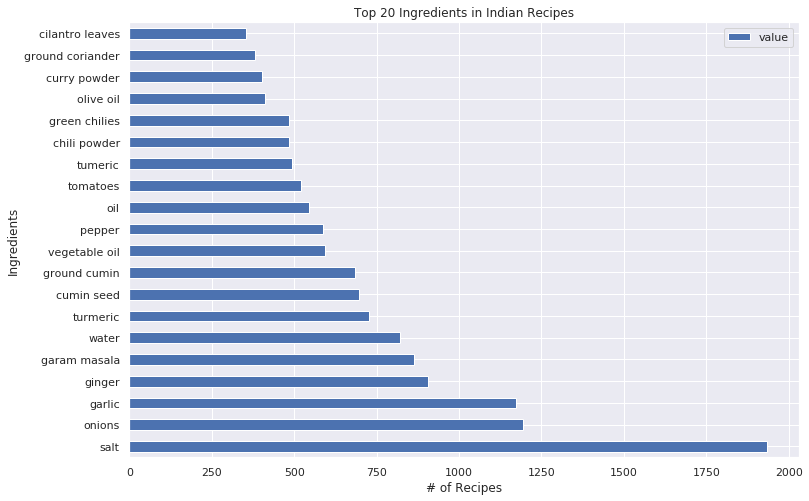

In [0]:
ax_indian = indian_final[:20].plot(kind='barh', figsize=(12,8))
ax_indian.set_ylabel("Ingredients")
ax_indian.set_xlabel("# of Recipes")
ax_indian.set_title('Top 20 Ingredients in Indian Recipes');

## Top Chinese Ingediants

In [0]:
chinese = cuisine.get_group('chinese')
chinese_top= chinese.melt(id_vars='cuisine').drop(['cuisine', 'variable'], axis=1)
chinese_final = pd.DataFrame(chinese_top['value'].value_counts())
print(chinese_final.shape)
chinese_final.head()

(4452, 1)


,value
soy sauce,1363
garlic,1184
ginger,959
sesame oil,915
salt,907


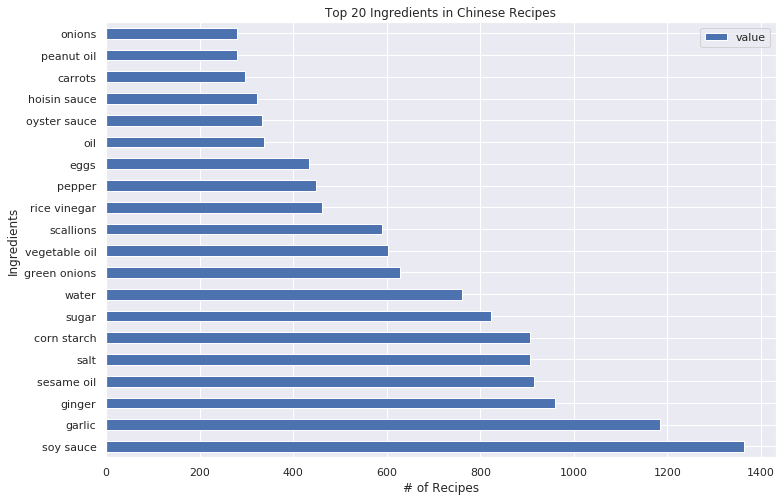

In [0]:
ax_chinese = chinese_final[:20].plot(kind='barh', figsize=(12,8))
ax_chinese.set_ylabel("Ingredients")
ax_chinese.set_xlabel("# of Recipes")
ax_chinese.set_title('Top 20 Ingredients in Chinese Recipes');

## Top Russian Ingediants

In [0]:
russian = cuisine.get_group('russian')
russian_top= russian.melt(id_vars='cuisine').drop(['cuisine', 'variable'], axis=1)
russian_final = pd.DataFrame(russian_top['value'].value_counts())
print(russian_final.shape)
russian_final.head()

(1350, 1)


,value
salt,288
eggs,197
butter,197
flour,184
sugar,155


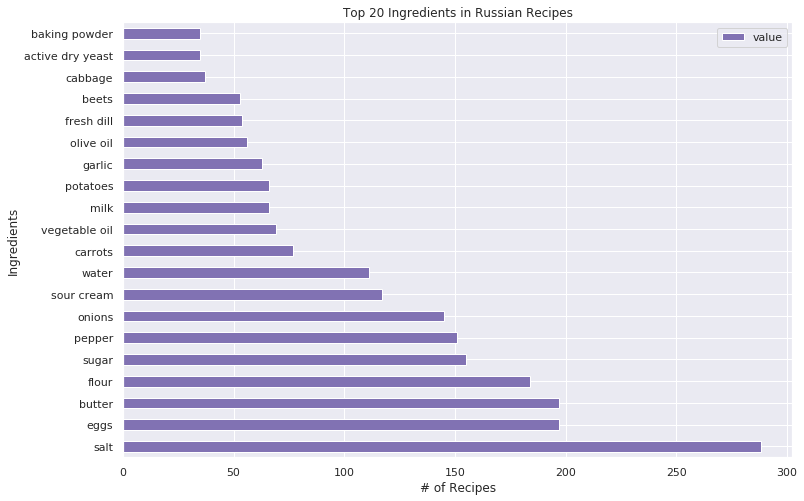

In [0]:
ax_russian = russian_final[:20].plot(kind='barh', figsize=(12,8),color = 'm')
ax_russian.set_ylabel("Ingredients")
ax_russian.set_xlabel("# of Recipes")
ax_russian.set_title('Top 20 Ingredients in Russian Recipes');

## Top Moroccan Ingediants

In [0]:
moroccan = cuisine.get_group('moroccan')
moroccan_top= moroccan.melt(id_vars='cuisine').drop(['cuisine', 'variable'], axis=1)
moroccan_final = pd.DataFrame(moroccan_top['value'].value_counts())
print(moroccan_final.shape)
moroccan_final.head()

(1783, 1)


,value
olive oil,540
salt,413
garlic,366
ground cumin,348
pepper,347


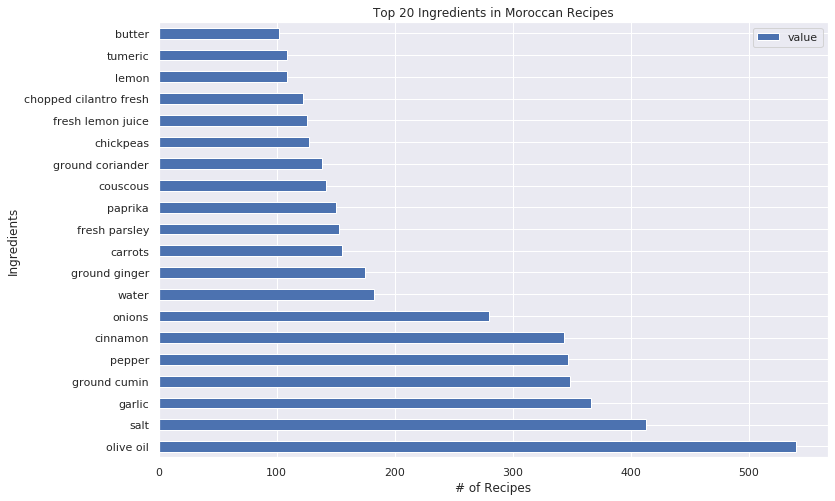

In [0]:
ax_moroccan = moroccan_final[:20].plot(kind='barh', figsize=(12,8))
ax_moroccan.set_ylabel("Ingredients")
ax_moroccan.set_xlabel("# of Recipes")
ax_moroccan.set_title('Top 20 Ingredients in Moroccan Recipes');

## Top Brazilian Ingediants

In [0]:
brazilian = cuisine.get_group('brazilian')
brazilian_top= brazilian.melt(id_vars='cuisine').drop(['cuisine', 'variable'], axis=1)
brazilian_final = pd.DataFrame(brazilian_top['value'].value_counts())
print(brazilian_final.shape)
brazilian_final.head()

(1307, 1)


,value
salt,194
garlic,165
onions,133
olive oil,131
pepper,127


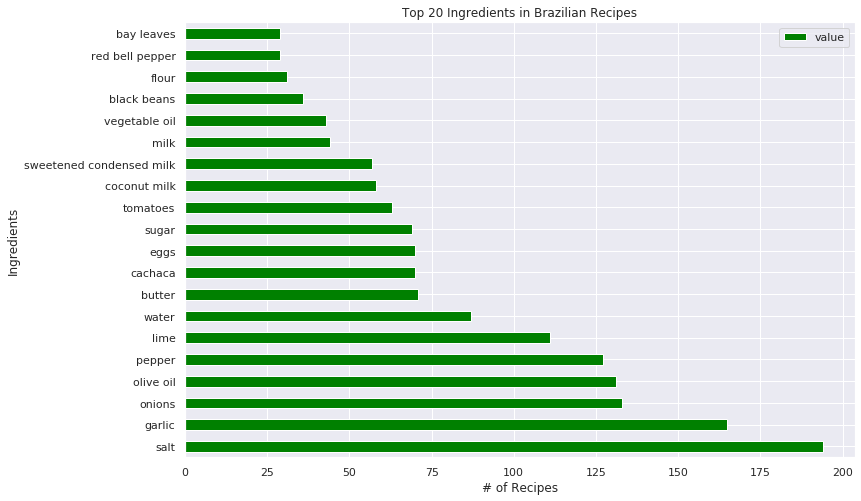

In [0]:
ax_brazilian = brazilian_final[:20].plot(kind='barh', figsize=(12,8), color = 'green')
ax_brazilian.set_ylabel("Ingredients")
ax_brazilian.set_xlabel("# of Recipes")
ax_brazilian.set_title('Top 20 Ingredients in Brazilian Recipes');